# Gmail Experiment: Introduction
Author: Leon Yin and Surya Mattu<br>
Links: [GitHub](https://github.com/the-markup/investigation-wheres-my-email/blob/master/notebooks/0-intro-to-the-story.ipynb) | [nbviewer](https://nbviewer.jupyter.org/github/the-markup/investigation-wheres-my-email/blob/master/notebooks/0-intro-to-the-story.ipynb) | [Story](https://themarkup.org/google-the-giant/2020/02/26/wheres-my-email) <br>

This notebook reproduces the chart and statistics in the introduction to our experiment for the Gmail promotions story. 

The input data was provided to us by Change.org, CREDO Action, Democracy for America, and Sum of US with the expectation that raw counts would not be shared. The data was exported from their content management systems, and preprocessed by the Markup.

Please read more about the experiment [here](https://themarkup.org/google-the-giant/2020/02/26/show-your-work-wheres-my-email) and read the article [here](https://themarkup.org/google-the-giant/2020/02/26/wheres-my-email)

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# inputs
fn = '../data/input/open_rate_ratio_aggregated.csv'

# outputs
figure_dir = '../data/output/figures'
fn_out = os.path.join(
    figure_dir, 'F1-gmail-vs-non-gmail-open-rates-2017-2019.png'
)
os.makedirs(figure_dir, exist_ok=True)

Let's read the file into Pandas, and create a datetime index. This will make is easier to cut the data temporally, and creating timeseries plots.

In [3]:
df = pd.read_csv(fn)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

This is what the dataset looks like:

In [4]:
df.head(2)

,ratio_gm_ngm,org
date,,
2017-01-31,1.297669,change.org
2017-02-28,1.513601,change.org


Where each row describes the ratio of Gmail to non-Gmail opens rates (`ratio_gm_ngm`) of an organization (`org`) for one month (`date`). 

We use a metric that captures the relationship between Gmail open rates and non-Gmail open rates.

$\begin{aligned}
\text{open rates}_{Gmail} = \frac{\text{opens}_{gmail}}{\text{sends}_{gmail}}
\end{aligned}$

$\begin{aligned}
\text{open rates}_{NonGmail} = \frac{\left(\text{opens}_{global}-\text{opens}_{gmail} \right)}{\left(\text{sends}_{global}-sends_{gmail} \right)}\\
\end{aligned}$

$\begin{aligned}
\text{ratio}_{Gmail:NonGmail} = \frac{\text{open rates}_{Gmail} }{\text{open rates}_{NonGmail}}
\end{aligned}$

That last equation describes Gmail open rates relative to non-Gmail open rates (`ratio_gm_ngm`). 

### How does this metric change over time?

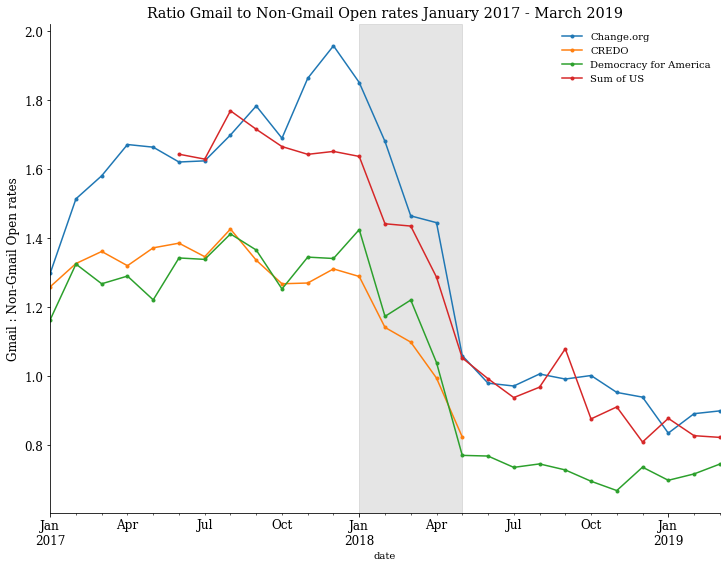

In [5]:
# Dates of change.
start_date_changes ='2018-01-31'
end_date_changes = '2018-05-31'

# to turn the orgname to a real title
org2name = {
    'change.org' : 'Change.org',
    'credo' : 'CREDO',
    'dfa' : 'Democracy for America',
    'sum_of_us' : 'Sum of US'
}

# set font
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

# aggregate and plot
for org, _df in df.groupby("org"):
    ax = _df["ratio_gm_ngm"].plot(figsize=(12, 9),
                                  style='.-',
                                  label=org2name.get(org),
                                  legend=True);
# set grey-area
plt.axvspan(pd.Timestamp(start_date_changes), 
            pd.Timestamp(end_date_changes), 
            color='gray', alpha=0.2)

# annotations
ax.set_title("Ratio Gmail to Non-Gmail Open rates January 2017 - March 2019", size='x-large')
ax.set_ylabel("Gmail : Non-Gmail Open rates", size='large')
ax.legend(frameon=False)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig(fn_out)
plt.show();

### What was the average ratio of Gmail to non-Gmail `ratio_gm_ngm` in 2017?

In [6]:
df.loc[: '2017-12-31'].groupby('org')  \
                      .ratio_gm_ngm.mean() \
                      .sort_values()

org
dfa           1.304922
credo         1.331316
change.org    1.663494
sum_of_us     1.673538
Name: ratio_gm_ngm, dtype: float64

### How much did Gmail to non-Gmail open rates change between January to May 2018 (grey box)?

In [7]:
grey_delta = (
    df.loc[end_date_changes].set_index('org') 
  - df.loc[start_date_changes].set_index('org')
).sort_values(by='ratio_gm_ngm')

grey_delta

,ratio_gm_ngm
org,
change.org,-0.792042
dfa,-0.654714
sum_of_us,-0.584471
credo,-0.465480


### What was the average change all four orgs experienced in early 2018 (grey box)?

In [8]:
grey_delta.mean()

ratio_gm_ngm   -0.624176
dtype: float64

### What is the average ratio of Gmail to non-Gmail after April 2018?

In [9]:
df.loc[end_date_changes :].groupby('org')     \
                          .ratio_gm_ngm.mean() \
                          .sort_values()

org
dfa           0.727172
credo         0.822945
sum_of_us     0.922387
change.org    0.956365
Name: ratio_gm_ngm, dtype: float64

Note CREDO Action did not give us data past May 2018.